In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import seaborn as sns
from sklearn import *
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from scipy.stats import pointbiserialr, spearmanr
from sklearn.model_selection import train_test_split

In [2]:
header_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

data = pd.read_csv("census.data", names=header_list)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data distribution (histograms & box-plots)

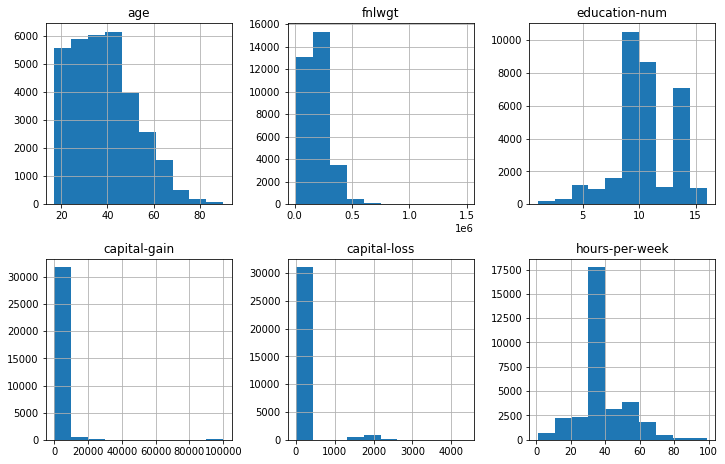

In [4]:
data.hist(figsize=(12,12), layout=(3,3), sharex=False);

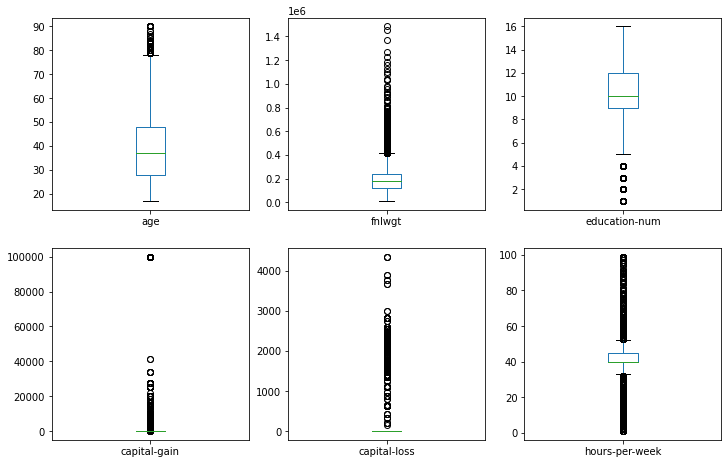

In [5]:
data.plot(figsize=(12,12), layout=(3,3), kind='box', sharex=False, subplots=True);

# income & sex

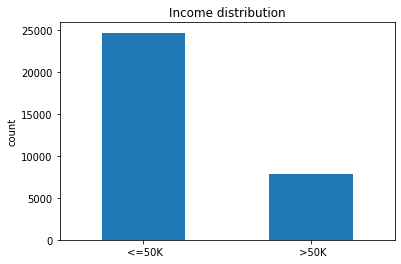

In [6]:
data["income"].value_counts().plot(kind = 'bar')
plt.ylabel("count")
plt.title("Income distribution")
plt.xticks(rotation=0);

<AxesSubplot:>

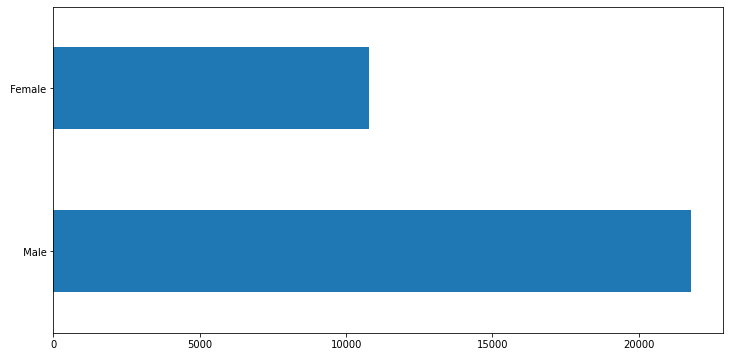

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))


data["sex"].value_counts().plot(kind = 'barh')

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


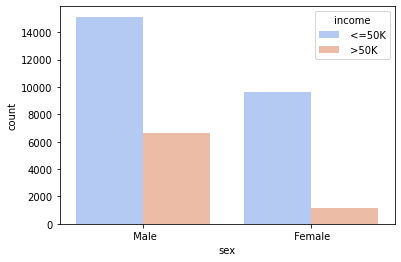

In [8]:
sns.countplot(data['sex'], palette='coolwarm', hue='income', data=data);

# data & education

<AxesSubplot:>

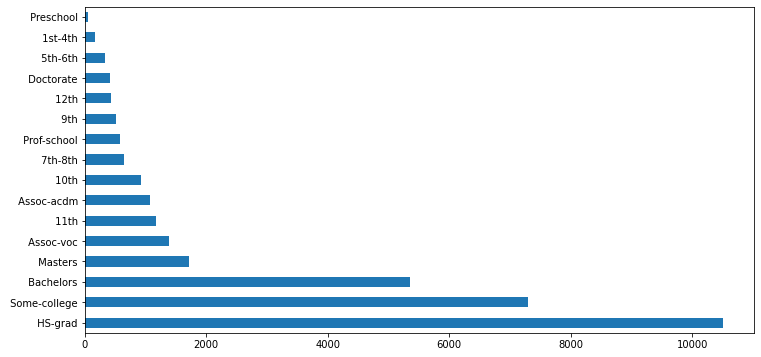

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))


data["education"].value_counts().plot(kind = 'barh')

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


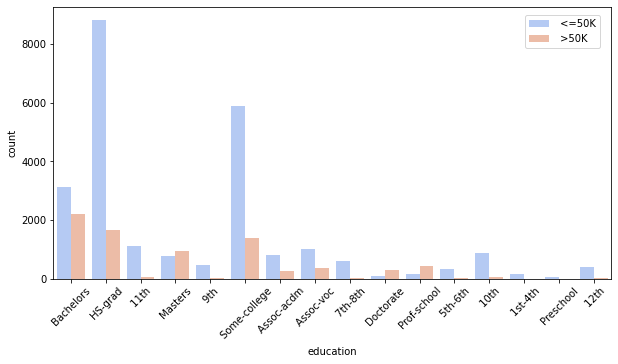

In [10]:
plt.figure(figsize=(10,5));
sns.countplot(data['education'], palette='coolwarm', hue='income', data=data);
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.);
plt.xticks(rotation=45);

# income & marital status

<AxesSubplot:>

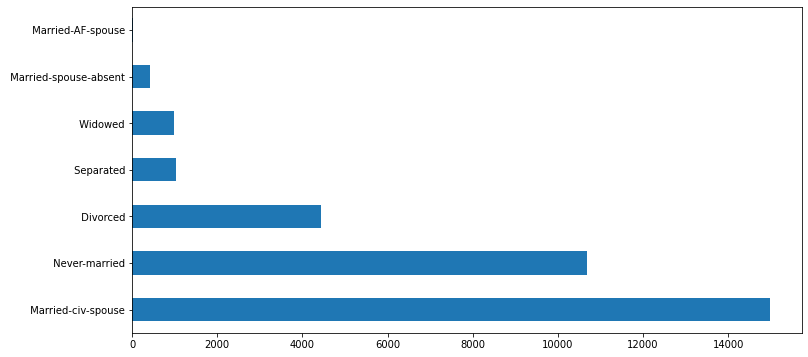

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))


data['marital-status'].value_counts().plot(kind = 'barh')

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


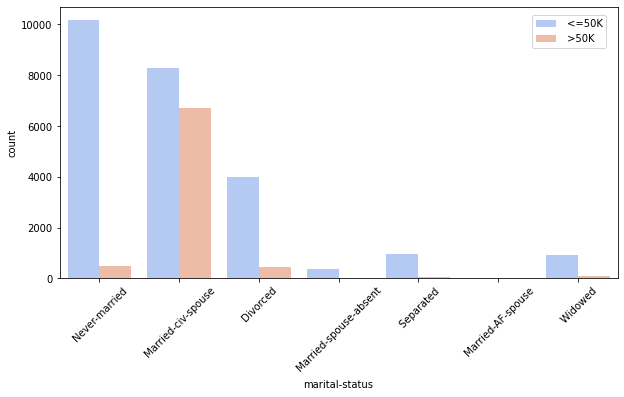

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['marital-status'], palette='coolwarm', hue='income', data=data)
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.)
plt.xticks(rotation=45);

<AxesSubplot:>

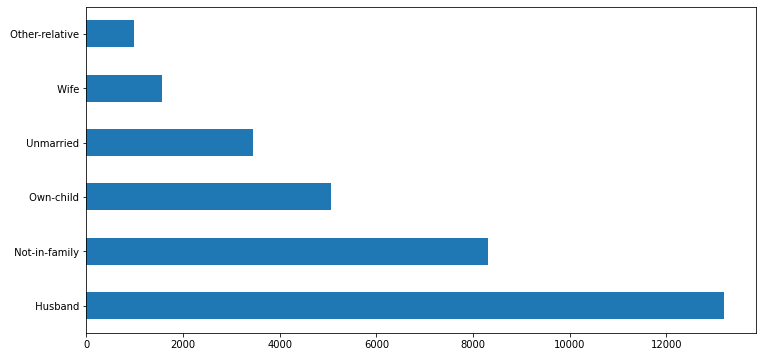

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))


data['relationship'].value_counts().plot(kind = 'barh')

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


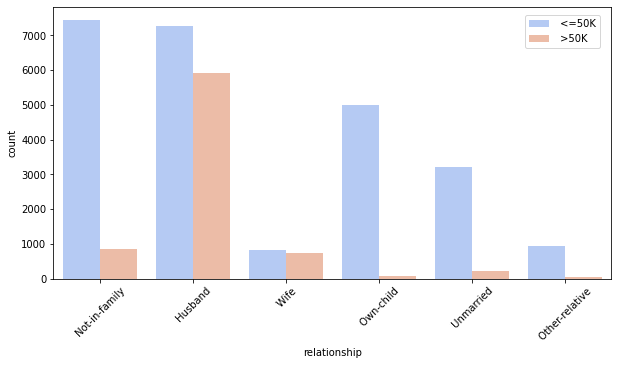

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data['relationship'], palette='coolwarm', hue='income', data=data)
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.)
plt.xticks(rotation=45);

# income & race

<AxesSubplot:>

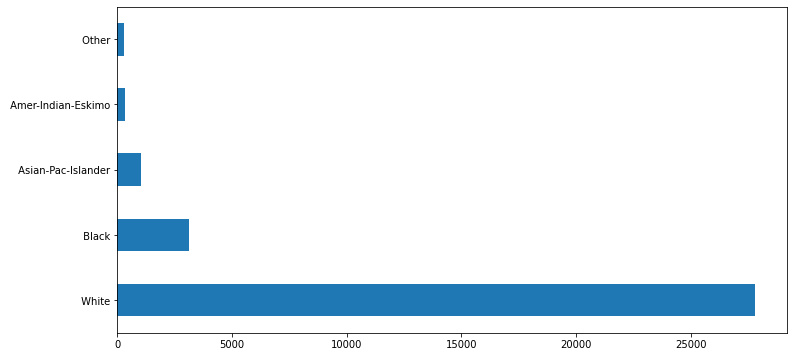

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))


data["race"].value_counts().plot(kind = 'barh')

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


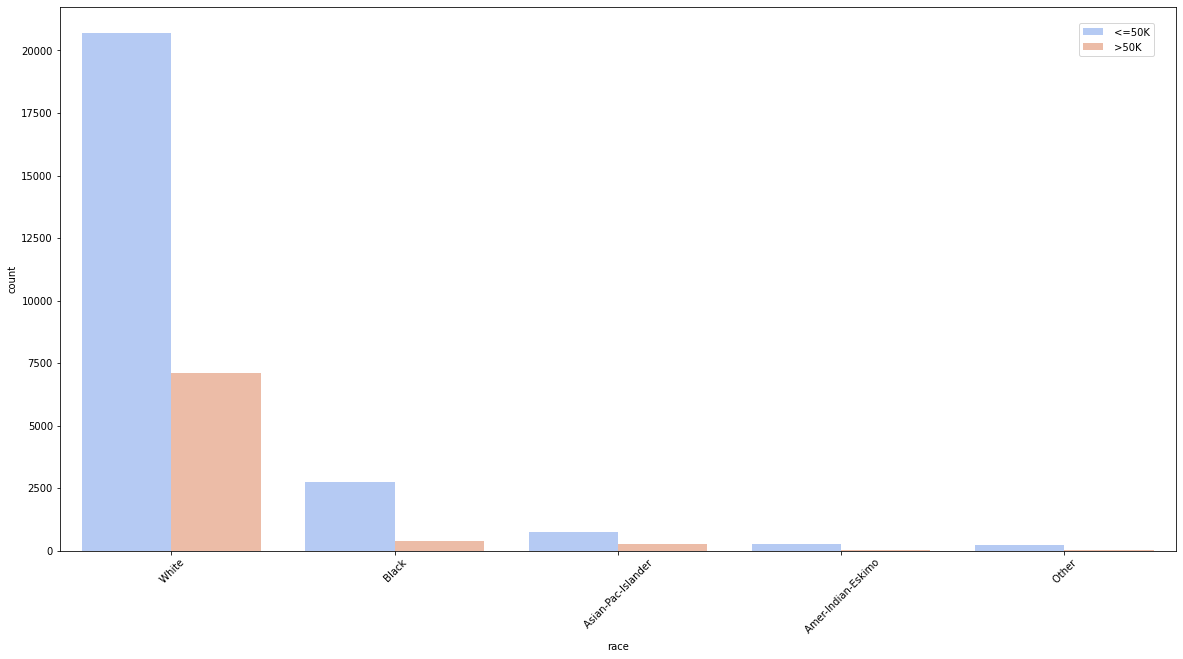

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data['race'], palette='coolwarm', hue='income', data=data)
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.)
plt.xticks(rotation=45);

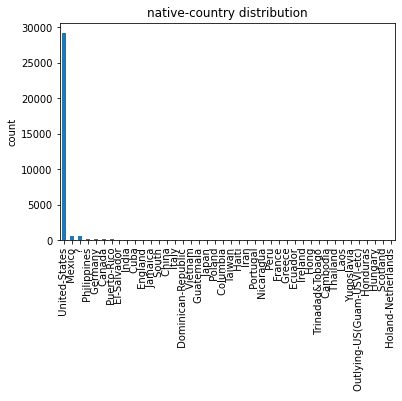

In [17]:
data["native-country"].value_counts().plot(kind = 'bar')
plt.ylabel("count")
plt.title("native-country distribution")
plt.xticks(rotation=90);

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


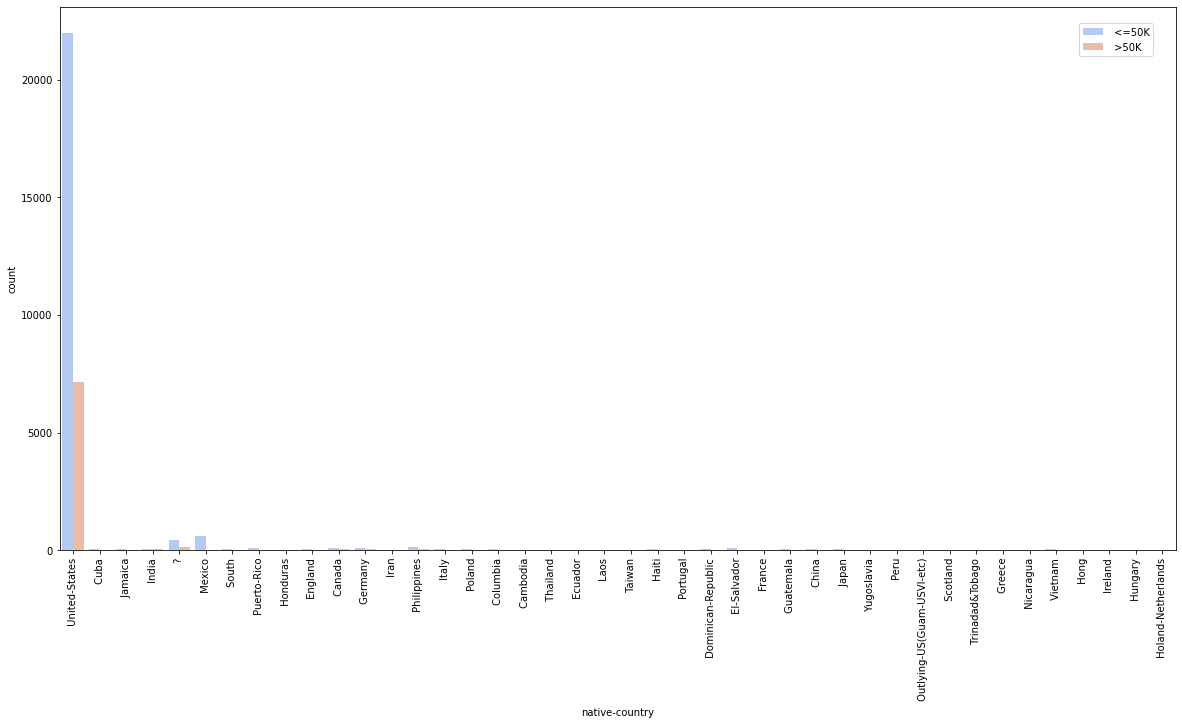

In [18]:
plt.figure(figsize=(20,10));
sns.countplot(data['native-country'], palette='coolwarm', hue='income', data=data);
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.);
plt.xticks(rotation=90);

# income & age

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


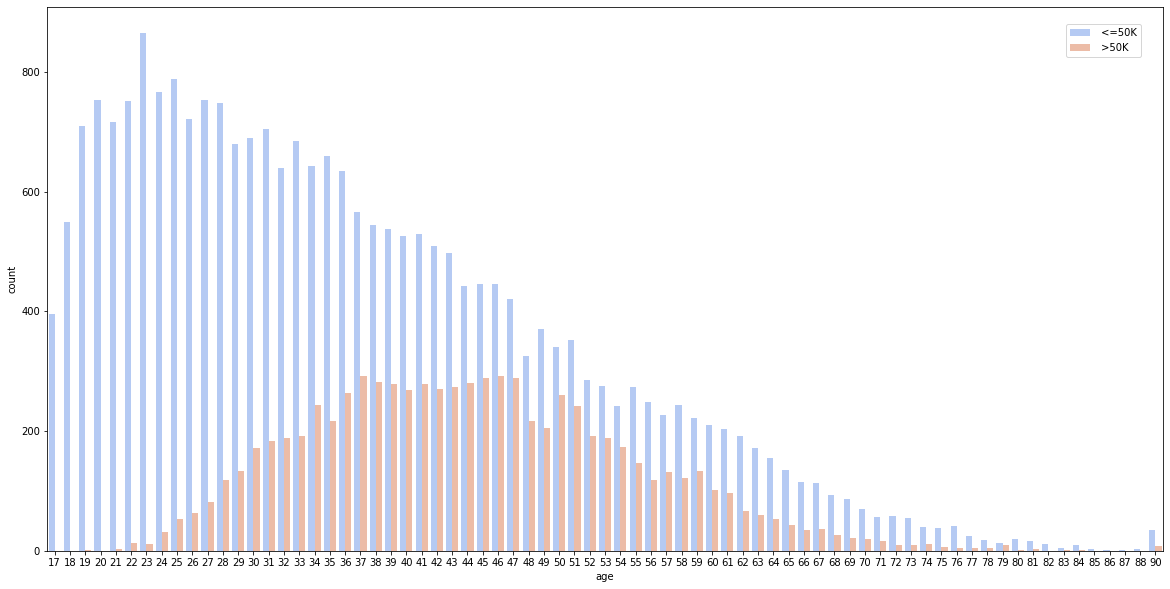

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data['age'], palette='coolwarm', hue='income', data=data)
plt.legend(bbox_to_anchor=(0.98, 0.97), loc=1, borderaxespad=0.)
plt.show()

## Data pre-processing

In [20]:
# remove missing values
data = data[data["workclass"] != " ?"]
data = data[data["occupation"] != " ?"]
data = data[data["native-country"] != " ?"]

In [21]:
# change target data to int type
mapping = {' >50K': 1, ' <=50K': 0}
data.income = [mapping[item] for item in data.income]

In [22]:
# drop target class
target = data['income']
features = data.drop('income', axis='columns')

df_f = pd.DataFrame(data = features)
df_t = pd.DataFrame(data = target)

In [23]:
# split features into data types
numerical = [i for i in df_f.columns if df_f[i].dtypes != 'object']
categorical = [i for i in df_f.columns if i not in numerical]
discreet = [i for i in numerical if len(df_f[i].unique()) < 10]
continuous = [i for i in numerical if i not in discreet]

In [24]:
# Min-Max scaling
scaler = MinMaxScaler()
df_f_scaled = pd.DataFrame(data = df_f)
df_f_scaled[numerical] = scaler.fit_transform(df_f_scaled[numerical])

In [25]:
# best features according to corr-matrix
selected_features = ['marital-status', 'education-num', 'relationship', 'age', 'hours-per-week', 'capital-gain']

In [26]:
# all features selected processed features
features_processed_raw = pd.get_dummies(df_f_scaled)
features_processed_reduced = pd.get_dummies(df_f_scaled[selected_features])

## Classifiers 

#### RAW

In [28]:
# X = features_processed_reduced
# y = df_t

# X_train, X_test, y_train, y_test= train_test_split(features_processed_reduced, df_t, test_size=0.2)

# models = {}

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# models['Logistic Regression'] = LogisticRegression()

# # Support Vector Machines
# from sklearn.svm import LinearSVC
# models['Support Vector Machines'] = svm.SVC()

# # Decision Trees
# from sklearn.tree import DecisionTreeClassifier
# models['Decision Trees'] = DecisionTreeClassifier()

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier
# models['Random Forest'] = RandomForestClassifier()

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# models['Naive Bayes'] = GaussianNB()

# # K-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier
# models['K-Nearest Neighbor'] = KNeighborsClassifier()

### opt

In [46]:
X = features_processed_reduced
y = df_t

X_train, X_test, y_train, y_test = train_test_split(features_processed_reduced, df_t, test_size=0.2)


models = {}

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# models['Logistic Regression'] = LogisticRegression()

# Logistic Regression Opt.
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(      
    C=206.913808111479, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class= 'auto',
     n_jobs=None, penalty='l2', random_state=None, solver='sag',
     tol=0.0001, verbose=0, warm_start=False
)

# # Support Vector Machines
# from sklearn.svm import LinearSVC
# models['Support Vector Machines'] = svm.SVC()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = svm.SVC(
    C=1438.44988828766, break_ties=False, cache_size=200, class_weight=None, 
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False
)


# # Decision Trees
# from sklearn.tree import DecisionTreeClassifier
# models['Decision Trees'] = DecisionTreeClassifier()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(
    criterion='gini', max_depth=10, min_samples_leaf=1,
    min_samples_split=4, splitter='best'
)

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier
# models['Random Forest'] = RandomForestClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(
     criterion='entropy', max_depth=20, max_features='auto',
     min_samples_leaf=1, min_samples_split=2,n_estimators=200,
     n_jobs=-1, verbose=0
)

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# models['Naive Bayes'] = GaussianNB()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB(var_smoothing=3.511191734215127e-05)

# # K-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier
# models['K-Nearest Neighbor'] = KNeighborsClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='minkowski',
     metric_params=None, n_jobs=None, n_neighbors=25,
     p=2, weights='uniform'
)

In [47]:
# SMOTE sampling
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

## Save models

In [48]:
# # save as object
# import pickle

# s = pickle.dumps(clf)
# clf2 = pickle.loads(s)

# # save to file
# from joblib import dump

# dump(clf, 'filename.joblib') 

# # load from file
# from joblib import load

# clf = load('filename.joblib')

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

accuracy, precision, recall = {}, {}, {}

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_SMOTE, y_train_SMOTE)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  predictions)
    auc = roc_auc_score(y_test, predictions)
    
    result_table = result_table.append({'classifiers':models[key].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

# model_names = list(models.keys())   

result_table.set_index('classifiers', inplace=True)

C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Majd\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-50-d165bdca5ca5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(X_train_SMOTE, y_train_SMOTE)
C:

MemoryError: Unable to allocate 1.00 GiB for an array with shape (3698, 36294) and data type float64

In [33]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import fbeta_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# def train_predict (learner, sample_size, X_train, y_train, X_test, y_test):
#     results = {}
#     learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
#     predictions_test = learner.predict (X_test)
#     predictions_train = learner.predict(X_train[:300])
#     results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
#     results['acc_test'] = accuracy_score(y_test, predictions_test)
#     results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
#     results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
#     print("{} trained on {} samples.".format (learner.__class__.__name__, sample_size))
#     return results

# random_state = 42
# clf_A = RandomForestClassifier()
# #      criterion='entropy', max_depth=20, max_features='auto',
# #      min_samples_leaf=1, min_samples_split=2,n_estimators=200,
# #      n_jobs=-1, verbose=0)
# clf_B = GaussianNB()

# samples_100 = len(y_train)
# samples_10 = int(len(y_train)/10)
# samples_1 = int(len(y_train)/100)

# results = {}
# for clf in [clf_A, clf_B]:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     for i, samples in enumerate([samples_1, samples_10, samples_100]):
#          results[clf_name] [i] = \
#         train_predict(clf, samples, X_train_SMOTE, y_train_SMOTE, X_test, y_test)

In [34]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# clf = RandomForestClassifier(random_state = 42)
# parameters ={
#     'max_depth': [10,20,30,40],
#     'max_features': [2, 3],
#     'min samples leaf': [3, 4, 5],
#    'min samples split': [8, 10, 12],
#     'n_estimators': [50,100,150]}

# scorer = make_scorer(fbeta_score, beta=0.5)
# grid_obj = GrīdSearchCV (estimator=clf, param grid=parameters, scoring=scorer)
# grid_fit = grid_obj.fit(X_train, y train)
# best clf = grid_fit.best_ estimator
# predictions = (člf.fit(X_train, y train)).predict(X_test)
# best_predictions = best_clf.predict(X_ test)
# print("Unoptimized model\n------")
# print("Accuracy score on testing data {:.4f}".format(accuracy_score(y_test, predictions)))
# print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
# print ("\n0ptimized Model\n- ")
# print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

In [ ]:
ax  = df_model.plot.bar(rot=45, figsize=(10,5))
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.figure(figsize=(60,30))
plt.tight_layout()
plt.show()

In [ ]:


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             label=f"{i}, AUC={result_table.loc[i]['auc']:.3f}")
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(bbox_to_anchor=(1.51, 1.0), loc=1, borderaxespad=0.1)

plt.show()

# Appendix

## Finding best hyperparameters (optimization)

In [38]:



# ## GRID SEARCH OPTMIZIER ##

# # Random Forest
# cls = ensemble.RandomForestClassifier(n_jobs=-1)
# param_grid = {"n_estimators": [100, 200, 300, 400], "max_depth":[1, 3, 5, 7, 20], "criterion": ["gini", "entropy"]}
# model = model_selection.GridSearchCV(estimator=cls, param_grid=param_grid, scoring='f1', verbose=10, n_jobs=1, cv=5)

# # Logistic Regression
# cls = LogisticRegression()
# param_grid = [{
#     "penalty": ['l1', 'l2', 'elasticent', 'none'],
#     'C':  np.logspace(-4, 4, 20),
#     "solver": ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
#     "max_iter": [100, 1000, 2500, 5000]
# }]
# model = model_selection.GridSearchCV(estimator=cls, param_grid=param_grid, scoring='f1', verbose=True, n_jobs=-1, cv=3)

# # Decision Tree
# cls = DecisionTreeClassifier()
# param_grid = {
#     "max_depth": (10, 30, 50, 70, 90, 100),
#     "criterion": ('gini', 'entropy'),
#     "max_depth" : (3, 5, 7, 9, 10, 25),
#     "max_features" : ('auto', 'sqrt', 'log2'),
#     "min_samples_split": (2,4,6),
# }
# model = model_selection.GridSearchCV(estimator=cls, param_grid=param_grid, scoring='f1', verbose=True, n_jobs=-1, cv=5)

# # KNN
# cls = KNeighborsClassifier()
# params = {"n_neighbors": random.randint(1, 50, 60)}
# model = model_selection.RandomizedSearchCV(cls, params, n_iter=5 , scoring='f1', verbose=0, n_jobs=-1, cv=5)

# # SVM
# cls = GaussianNB()

# params = {'var_smoothing': np.logspace(0,-9, num=100)}

# model = model_selection.RandomizedSearchCV(cls, params, scoring='f1', verbose=True, n_jobs=-1, cv=5)

# model.fit(X_train, y_train)
# print("\n---------------------------------------------------------")
# print(model.best_score_, "\n")
# print(model.best_estimator_.get_params())

In [39]:
# pred = models['Decision Trees'].predict(X_test)
# roc = roc_auc_score(y_test, pred)

# print(f"roc_auc_score(test): {roc:.5f}\n")
# print(classification_report(y_test, pred))
# # print(classification_report(y_train, X_train))



# # from sklearn.metrics import confusion_matrix

# # #Generate the confusion matrix
# cf_matrix = confusion_matrix(y_test, pred)


# print(f"train acc: {models['Decision Trees'].score(X_train, y_train):.3f}")
# print(f"Test acc: {models['Decision Trees'].score(X_test, y_test):.3f}")
# print(f"\nConfusion matrix: \n {cf_matrix}")

In [40]:
# group_names = ['True Neg','False Pos','False Neg','True Pos']

# group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]

# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]

# labels = np.asarray(labels).reshape(2,2)

# ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# ax.set_title('Confusion Matrix \n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

`
# Best models params

### Random forest

#### Best params

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

#### Best scores

roc_auc_score: 0.755283672585535

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4618
           1       0.67      0.60      0.63      1415

    accuracy                           0.84      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.84      0.83      6033


### Logistic Regression

#### Best params
{'C': 206.913808111479, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

#### Best scores
roc_auc_score: 0.7473779816878798

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4618
           1       0.69      0.57      0.63      1415

    accuracy                           0.84      6033
   macro avg       0.78      0.75      0.76      6033
weighted avg       0.83      0.84      0.83      6033



### Decision Tree

#### Best params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
#### Best scores
roc_auc_score: 0.7265708507872309

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4515
           1       0.74      0.51      0.61      1518

    accuracy                           0.83      6033
   macro avg       0.80      0.73      0.75      6033
weighted avg       0.82      0.83      0.82      6033


### KNN

#### Best params
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}

#### Best scores
roc_auc_score(test): 0.74088

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4564
           1       0.70      0.56      0.62      1469

    accuracy                           0.83      6033
   macro avg       0.78      0.74      0.76      6033
weighted avg       0.83      0.83      0.83      6033

Test acc: 0.651
Test acc: 0.621

### SVM


#### Best params
{'C': 1438.44988828766, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
#### Best scores
roc_auc_score(test): 0.74019

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4566
           1       0.72      0.55      0.62      1467

    accuracy                           0.84      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.83      0.84      0.83      6033

Test acc: 0.625
Test acc: 0.623

### Naive Bayes

#### Best params
{'priors': None, 'var_smoothing': 3.511191734215127e-05}
#### Best scores
roc_auc_score(test): 0.77346

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      4543
           1       0.46      0.89      0.61      1490

    accuracy                           0.72      6033
   macro avg       0.70      0.77      0.69      6033
weighted avg       0.83      0.72      0.74      6033

train acc: 0.614
Test acc: 0.607

Confusion matrix: 
 [[3006 1537]
 [ 171 1319]]
`

### Results

`
                            Accuracy	Precision	Recall
Logistic Regression	        0.839383	0.565160	0.738870
Logistic Regression Opt	    0.841041	0.575639	0.738655
Support Vector Machines	    0.836731	0.516699	0.761583
Support Vector Machines Opt	0.842698	0.565815	0.751304
Decision Trees	            0.818830	0.571054	0.665649
Decision Trees Opt	        0.841704	0.658808	0.698611
Random Forest	            0.829770	0.599214	0.687970
Random Forest Opt	        0.841041	0.611002	0.718798
Naive Bayes             	0.729322	0.899149	0.481417
Naive Bayes Opt	            0.729985	0.899149	0.482093
K-Nearest Neighbor	        0.819990	0.575639	0.667426
K-Nearest Neighbor Opt   	0.832753	0.561886	0.716194


                            Accuracy	Precision	Recall
Logistic Regression     	0.796950	0.857143	0.555263
Support Vector Machines 	0.765788	0.898443	0.512355
Decision Trees          	0.809382	0.862559	0.573615
Random Forest	            0.812697	0.812458	0.584510
Naive Bayes             	0.730814	0.892349	0.473590
K-Nearest Neighbor       	0.789657	0.837508	0.545896
`

In [41]:
# y_test.value_counts()

In [42]:
# y_res.value_counts()

### Handling Class imbalance

In [43]:
# fig, ax = plt.subplots(figsize=(12, 6))


# y_train.value_counts().plot(kind = 'barh');

### SMOTE sampling

In [44]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [45]:
# fig, ax = plt.subplots(figsize=(12, 6))


# y_res.value_counts().plot(kind = 'barh');